# Assignment 3
Name: Rahul Tarak Balaji, utorid: tarakbal

### Imports

In [3]:
#from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as url
from decimal import *
#from statistics import mean 
%matplotlib inline

## Problem 1
### Proofs
**Proof of Three point Stencil**

$$\text{To prove : } y''(x)_2 = \frac{[y(x+h) -2 y(x) + y(x-h)]}{(h*h)}$$

Taking left and right derivatives, i.e  when h > 0 or when h < 0, we get -

$$\text{Eqn- 1 : } f(x_0 +h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)h^2}{2} +  \frac{f^{(3)}(x_0)h^3}{6} +  \frac{f^{(4)}(ξ_1)h^4}{24}$$

$$\text{Eqn- 2 : } f(x_0 -h) = f(x_0) - f'(x_0)h + \frac{f''(x_0)h^2}{2} -  \frac{f^{(3)}(x_0)h^3}{6} +  \frac{f^{(4)}(ξ_2)h^4}{24}$$

Adding Eqn1 and Eqn2

$$f(x_0 +h) + f(x_0 -h) = 2f(x_0) + {f''(x_0)h^2} + \frac{f^{(4)}(ξ)h^4}{12}$$

$$f''(x_0) = \frac{f(x_0 +h) + f(x_0 -h) -2f(x_0)}{h^2} -\frac{f^{(4)}(ξ)h^2}{12} \text{ QED}$$

**Proof of Five point Stencil**


$$\text{Eqn- 1 : } f(x_0 +h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)h^2}{2} +  \frac{f^{(3)}(x_0)h^3}{6} +  \frac{f^{(4)}(x_0)h^4}{24} + \frac{f^{(5)}(x_0)h^5}{120} + \frac{f^{(6)}(ξ_1)h^6}{720}$$
$$\text{Eqn- 2 : } f(x_0 -h) = f(x_0) - f'(x_0)h + \frac{f''(x_0)h^2}{2} -  \frac{f^{(3)}(x_0)h^3}{6} +  \frac{f^{(4)}(x_0)h^4}{24} - \frac{f^{(5)}(x_0)h^5}{120} + \frac{f^{(6)}(ξ_2)h^6}{720}$$

$$\text{Egn- 3 : } f(x_0+2h) = f(x_0) + 2f'(x_0)h+\frac{4}{2!}f''(x_0)h^2+\frac{8}{3!}f^{(3)}(x_0)h^3 + \frac{16f^{(4)}(x_0)h^4}{24} + \frac{32f^{(5)}(x_0)h^5}{120} + \frac{64f^{(6)}(ξ_3)h^6}{720} $$

$$\text{Egn- 4 :} f(x_0 - 2h) = f(x_0) - 2f'(x_0)h+\frac{4}{2!}f''(x_0)h^2-\frac{8}{3!}f^{(3)}(x_0)h^3 + \frac{16f^{(4)}(x_0)h^4}{24} - \frac{32f^{(5)}(x_0)h^5}{120} + \frac{64f^{(6)}(ξ_4)h^6}{720} $$

Adding Eqn 1 and Eqn 2 -
$$16f(x_0 +h) + 16f(x_0 -h) = 32f(x_0) + 16f''(x_0)h^2 + \frac{32f^{(4)}(x_0)h^4}{24} + \frac{32f^{(6)}(ξ_5)h^6}{720}$$

Adding Eqn 3 and Eqn 4 -
$$f(x_0 + 2h) + f(x_0 - 2h) = 2f(x_0) + 4f''(x_0)h^2 + \frac{32f^{(4)}(x_0)h^4}{24} + \frac{128f^{(6)}(ξ_6)h^6}{720}$$

Subtracting the Above Equations -
$$16f(x_0 +h) + 16f(x_0 -h) -( f(x_0 + 2h) + f(x_0 - 2h) )= 30f(x_0) + 12f''(x_0)h^2  - \frac{96f^{(6)}(ξ)h^6}{720}$$
$$\implies 12f''(x_0)h^2 = 16f(x_0 +h) + 16f(x_0 -h) - f(x_0 + 2h) - f(x_0 - 2h) ) - 30f(x_0) +  \frac{96f^{(6)}(ξ)h^6}{720}$$
$$\implies f''(x_0) = \frac{16f(x_0 +h) + 16f(x_0 -h) - f(x_0 + 2h) - f(x_0 - 2h) ) - 30f(x_0)}{12h^2} + \frac{96f^{(6)}(ξ)h^4}{8640} \text{ QED}$$

### Error Terms

#### For three point stencil, the error term is
$$-\frac{f^{(4)}(ξ)h^2}{12}$$
#### For four point stencil, the error term is
$$ \frac{96f^{(6)}(ξ)h^4}{8640}$$

This follows the order of accuracy of h^p

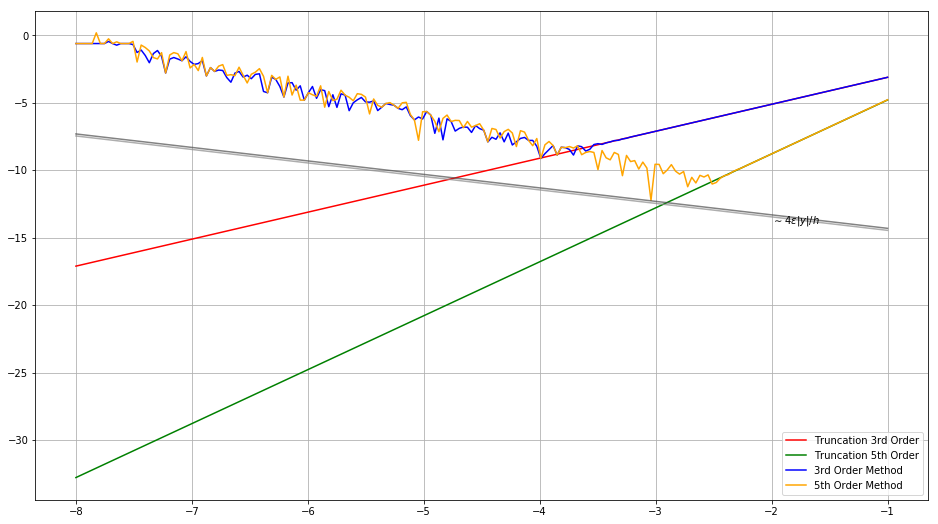

In [23]:
# Below are the mathematical functions for f(x), f'(x), df^4/d^4x(f(x)), df^6/d^6x(f(x))
def f(x):
    return np.sqrt(x)
def f_2(x):
    return -1/4*x**(-3/2)
def f_4(x):
    return -15/(16*x**(7/2))
def f_6(x):
    return -945/(64*x**(11/2))

# main program
# differrent differentiation schemes
logh = -np.linspace(8,1,200)   # -8...0
h = 10.**logh 
eps = 2.22e-16
x = 1
analyitical_value = -1/4

# numerical differentiation  
# p = 2 diff. formula
d1f_2 = (f(x+h)+f(x-h)-2*f(x))/h**2
# p = 4 diff. formula
d1f_4 = (16*f(x+h)+16*f(x-h)-f(x-2*h)-f(x+2*h) -30*f(x))/(12*h*h)
residual_2 =  np.absolute(d1f_2 -f_2(x))
residual_4 = np.absolute(analyitical_value - d1f_4 )
trucation_2 = (abs(f_4(x))*h**2)/12
trucation_4 = np.absolute((96*f_6(x)*h**4)/8640)
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(logh,np.log10(trucation_2),"red")
plt.plot(logh,np.log10(trucation_4),"green")
plt.plot(logh,np.log10(residual_2), "blue")
plt.plot(logh,np.log10(residual_4),"orange")
for p in [2,4]: 
    """
    Not sure how this code segment inside for loop works, directly copied from the example text file
    """
    E_round = np.array((5*p)**0.5/2*eps*abs(f(x))/h) 
    logE = np.log10(E_round)
    c = 0.8-p/8
    plt.plot(logh,logE,color=(c,c,c),alpha=0.7)
plt.grid()
plt.text(-2.,-13.9,'$\sim 4\epsilon |y|/h$')
axes = plt.gca()
axes.legend(["Truncation 3rd Order","Truncation 5th Order","3rd Order Method","5th Order Method"])
plt.show()

## Problem 2
Planet | Semi-major Axis
---- | ----
Mercury | 0.387098 AU
Venus | 0.723332 AU
Earth | 1.000001018 AU
Mars | 1.523679 AU
Ceres | 2.7691651545 AU
Jupiter | 5.2044 AU
Saturn | 9.5826 AU
Uranus | 19.2184 AU
Neptune | 30.11 AU


References

"Ceres (Dwarf Planet)". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Ceres_(dwarf_planet).

"Earth's Orbit". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Earth%27s_orbit.

"Jupiter". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Jupiter.

"Mars". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Mars.

"Mercury (Planet)". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Mercury_(planet).

"Neptune". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Neptune.

"Saturn". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Saturn.

"Uranus". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Uranus.

"Venus". En.Wikipedia.Org, 2019, https://en.wikipedia.org/wiki/Venus.



In [93]:
obs_axis = [0.387098,0.723332,1.000001018,1.523679,2.7691651545,5.2044,9.5826,19.2184,30.11]
d_obs = np.array(obs_axis)
def d_unvec(x):
    """
    Calculate all 9 distance values for given X
    """
    n = np.array([-2,-1,0,1,2,3,4,5,6])
    return x**n
d = np.vectorize(d_unvec)
def e(distance):
    """
    Calculate square of the arithmetic average of relative deivations
    """
    return np.sum( ((distance - d_obs)/d_obs)**2 )/9
e_vec = np.vectorize(e)
def dE_dx(x):
    """
    First Derivative of the function e(d(x)) using first principles, for arbitarily small number
    1e-10 as h, the smaller this number the more accurate the derivative is
    """
    return (e(d(x+1e-10)) -e(d(x)))/1e-10

In [96]:
a_n,b_n = 1.5,2.0
m = (a_n + b_n)/2
f_m = dE_dx(m)
list_m, list_f_m = [],[]
n = 0
while not(np.isclose([f_m],[0])):
    """
    Bisection Method Implementation, but instead of restricting to N iterations, this method will continue until
    the midoint isclose to 0
    """
    m = (a_n + b_n)/2
    f_m = dE_dx(m)
    f_a = dE_dx(a_n)
    f_b = dE_dx(b_n)
    list_m.append(m)
    list_f_m.append(f_m)
    if f_m*f_a < 0:
        a_n,b_n = a_n,m
    elif f_m*f_b < 0:
        a_n,b_n = m,b_n
    n += 1 
print("X Value for Minimun E((d(x))) - ",m,"Value of E(d(x)) at the X Value - ",f_m)
print("Number of Iterations -", n)

X Value for Minimun E((d(x))) -  1.7509384118020535 Value of E(d(x)) at the X Value -  0.0
Number of Iterations - 27


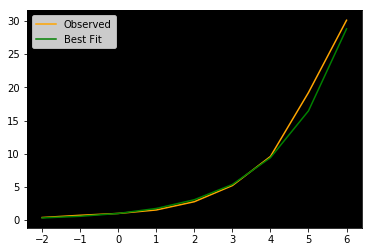

Planet Number(N) :  -2 Residual :  -0.06091730076811058
Planet Number(N) :  -1 Residual :  -0.15220968452643224
Planet Number(N) :  0 Residual :  -1.0180000000747924e-06
Planet Number(N) :  1 Residual :  0.22725941180205345
Planet Number(N) :  2 Residual :  0.2966201674238973
Planet Number(N) :  3 Residual :  0.16360128249547667
Planet Number(N) :  4 Residual :  -0.18356035987598496
Planet Number(N) :  5 Residual :  -2.761260460056711
Planet Number(N) :  6 Residual :  -1.2945622311269247


In [99]:
n = np.array([-2,-1,0,1,2,3,4,5,6])
plt.plot(n,d_obs,'orange')
plt.plot(n,d(m),'green')
axes = plt.gca()
axes.set_facecolor('xkcd:black') # Setting Background colour as black
axes.legend(['Observed','Best Fit'])
plt.show()
residuals = np.array(d(m) - d_obs)
for i in range(9):
    print("Planet Number(N) : ",n[i],"Residual : ",residuals[i])

## Problem 3


#### Proofs: 
**Proving the term in iterations is** $$x_{n+1} = x_n\times{(2-c\times x_n)}$$

General form for Newton's Method:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},\text{where f(x) and f'(x) are as follows}$$

$$f(x): 1/x - c, f'(x): -1/x^2$$

$$\implies x_{n+1} = x_n - \frac{(1/x_n - c)}{(-1/x_n^2)}$$

$$\implies  x_{n+1} = \frac{\frac{-1}{x_n} - \frac{1}{x_n} +c}{\frac{-1}{x^2_n}}$$

$$\implies x_{n+1} = \frac{2 -c\times {x_n}}{x_n}\times x^2_n$$

$$\implies x_{n+1} = x_n\times{(2-c\times{x_n})} \text{ QED}$$



#### Solving for C = 7, x_1 = 0.09 < 1/7

In [29]:
# Newtons method function from Tutorial 7 starter code
def newton(f, df, x0):
    """
    Find the root of the function f(x) where df(x) is a function
    which computes the derivative wrt x of f evaluated at x, x0 is
    and initial guess of the root
    """
    x0 = x0 - f(x0)/df(x0)
    return x0

In [30]:
def f(x):
    """
    Function f(x): 1/x -c, solving for f(x) = 0
    """
    return 1/x - 7
def df(x):
    """
    Derivative of f(x), defined above
    """
    return -1/((x)**2)

Newton's Method : Value, Iterations- 0.14285714285714285 7
Bisection Method : Value, Iterations- 0.14285714281722903 30 

Residual Plots 



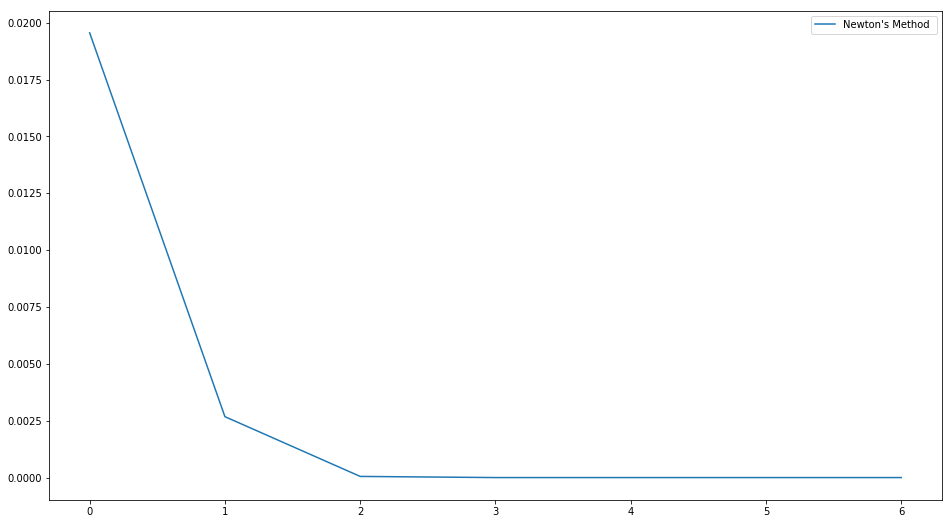

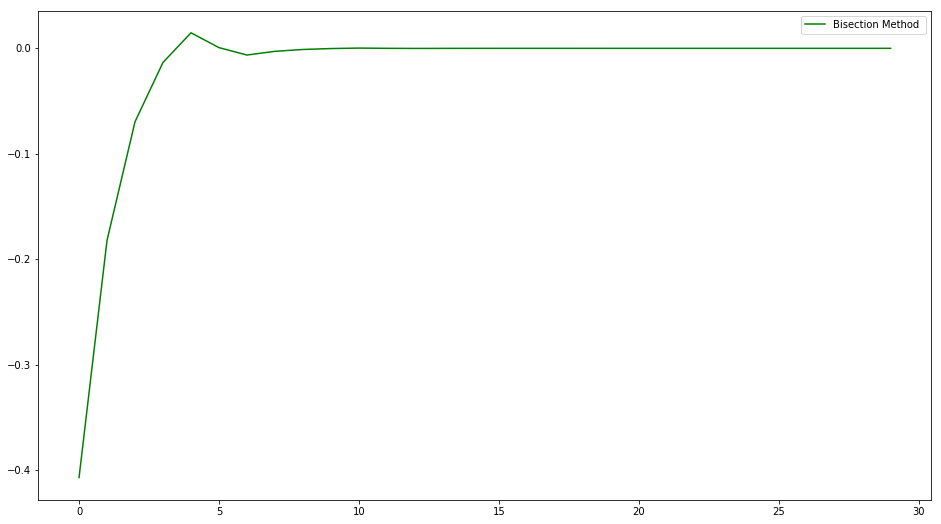

In [131]:
n = 0
lastVal, currentVal = 0, 0.09
approximation = []
while not lastVal == currentVal:
    """
    Newton's Method Implementation, using while loop to stop when the previous value is the same as the current value
    instead of using vectorized function for a given n value
    """
    lastVal = currentVal
    currentVal =  newton(f,df,currentVal)
    approximation.append(currentVal)
    n += 1
print("Newton's Method : Value, Iterations-",approximation[-1],n)
iterations = np.arange(n)
count = 0
a,b = 0.1, 1
m = (a+b)/2
f_m = f(m)
f_a = f(a)
f_b = f(b)
m_values = []
while not np.isclose([f_m],[0]):
    """
    Bisection Algorithm, exactly same as the one used in Problem 2
    """
    m = (a+b)/2
    if count > 52:
        break
    f_m = f(m)
    f_a = f(a)
    f_b = f(b)
    m_values.append(m)
    if f_m*f_a < 0:
        a,b = a,m
    elif f_m*f_b < 0:
        a,b = m,b
    count += 1
print("Bisection Method : Value, Iterations-", m, count,'\n')
bisection = np.array(m_values)
approximation = np.array(approximation)
residuals = 1/7 - approximation
residual_bisection = 1/7 - bisection
counts = np.arange(count)
print('Residual Plots','\n')
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(iterations,residuals)
axes = plt.gca()
axes.legend(["Newton's Method "])

plt.show()
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(counts,residual_bisection,'green')
axes = plt.gca()
axes.legend(["Bisection Method "])
plt.show()

## Problem 4


In [61]:
url.urlretrieve("http://planets.utsc.utoronto.ca/~pawel/pyth/IXIC.dat", "IXIC.dat")
url.urlretrieve("http://planets.utsc.utoronto.ca/~pawel/pyth/AAPL.dat", "AAPL.dat")
url.urlretrieve("http://planets.utsc.utoronto.ca/~pawel/pyth/INTC.dat", "INTC.dat")
pass
#Retriving Files

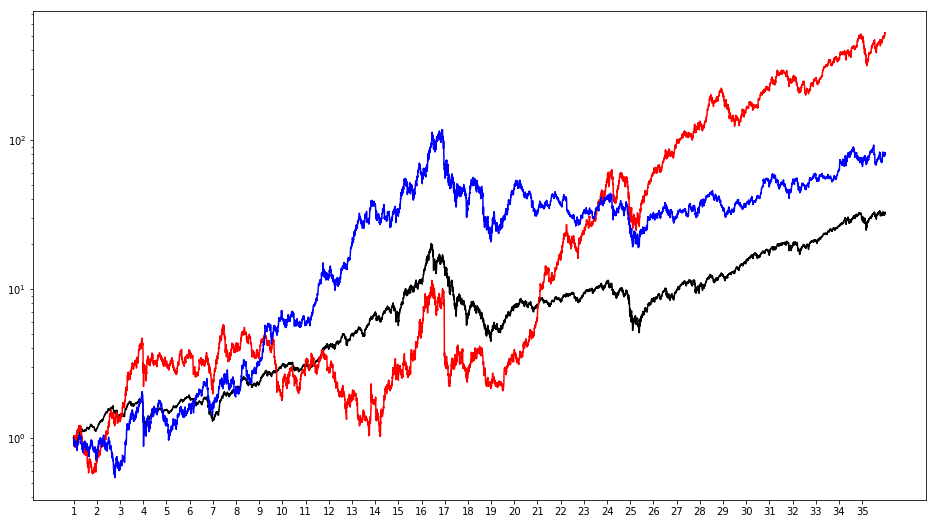

In [4]:
ixic = np.loadtxt('IXIC.dat')
aapl = np.loadtxt('AAPL.dat')
intc = np.loadtxt('INTC.dat')
t = np.arange(0, len(ixic))
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
# Semilog plot
plt.semilogy(t,ixic,color=(0,0,0))
plt.semilogy(t,aapl,color=(1,0,0))
plt.semilogy(t,intc,color=(0,0,1))
#Setting the axis
plt.xticks(range(1,len(ixic),252),range(1,36))
plt.show()

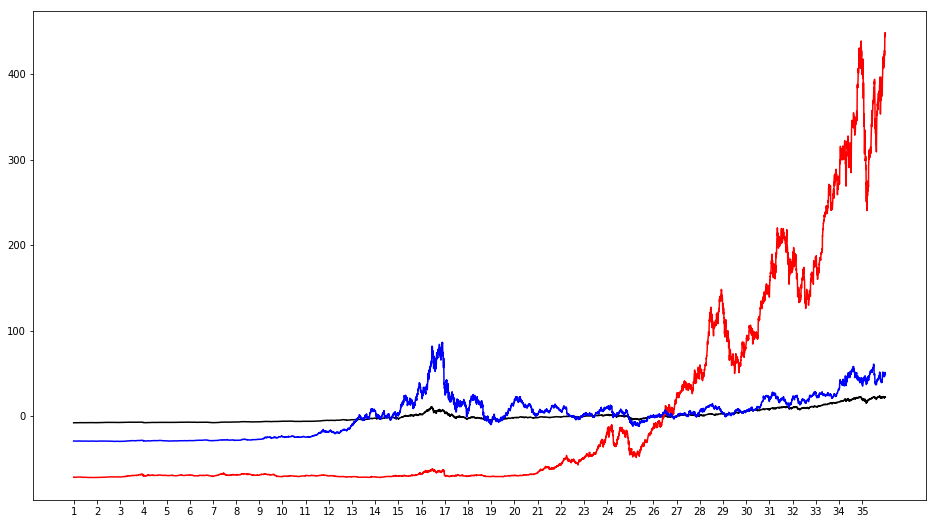

The above graph is the detrended data graph and below graph is normalized data graph 


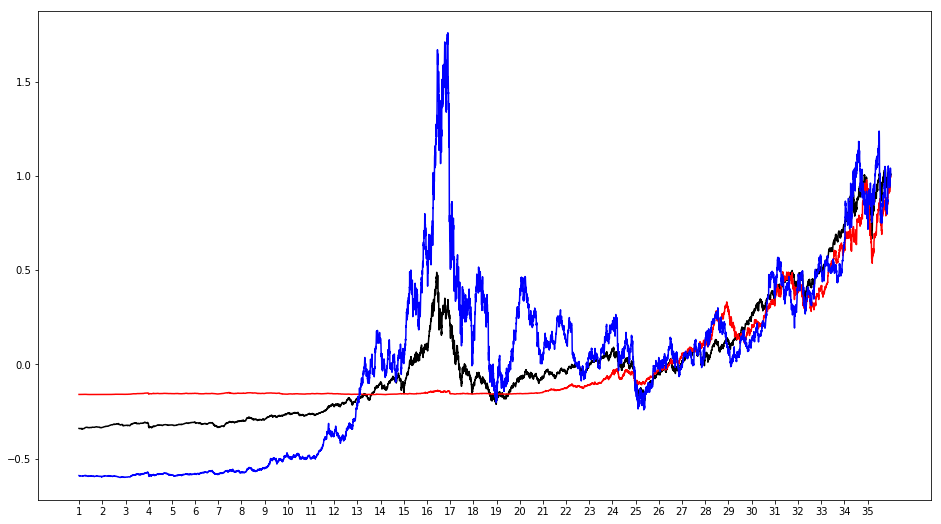

In [5]:
# Detrending the inflation trend line of 3%
# Line in the form y = mx+c
def detrend(data):
    """
    Returns detrended list, substracting the inflation rate
    """
    m  = 0.03/252 
    # This is the inflation rate per market day, as 252 market days a year and 0.03 inflation a year
    # c = mean(y) - m*mean(x)
    c = np.mean(data) - m*np.mean(t)
    line = m*t + c
    return data-line
def normalize(data):
    """
    Returns normalized list, where the data ends at value 1
    """
    lastVal = data[-1]
    return data/lastVal
# Creating Detrended Time Series
ixic_detrended = detrend(ixic)
aapl_detrended = detrend(aapl)
intc_detrended = detrend(intc)
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(t,ixic_detrended,color=(0,0,0))
plt.plot(t,aapl_detrended,color=(1,0,0))
plt.plot(t,intc_detrended,color=(0,0,1))
plt.xticks(range(1,len(ixic),252),range(1,36))
plt.show()
print("The above graph is the detrended data graph and below graph is normalized data graph ")
#Creating Renormalized Time Series
ixic_normal = normalize(ixic_detrended)
aapl_normal = normalize(aapl_detrended)
intc_normal = normalize(intc_detrended)
plt.figure(figsize=(16,9)) # Setting Larger Graph Size
plt.plot(t,ixic_normal,color=(0,0,0))
plt.plot(t,aapl_normal,color=(1,0,0))
plt.plot(t,intc_normal,color=(0,0,1))

plt.xticks(range(1,len(ixic),252),range(1,36))
plt.show()

Looking at the normalized data graph, it is clear that the general growth of the market or the IXIC data growth is mostly due to historic inflation graph. While the blue graph, intel stock price, INTC is very slightly above the general historic inflation growth, however about 20 years ago, the INTC stock was growing significantly faster than the inflation rate. Finally, the apple stock or AAPL, was growing negatively relative to the inflation rate for about the first 20 years of this data but in recent years has been growing significantly faster than inflation rate.

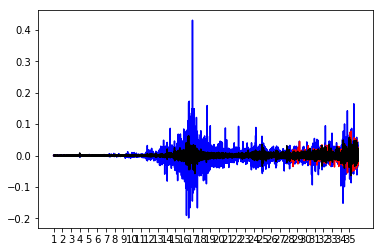

IXIC- Mean, Std -0.00015185066751938043 0.006815361238567073


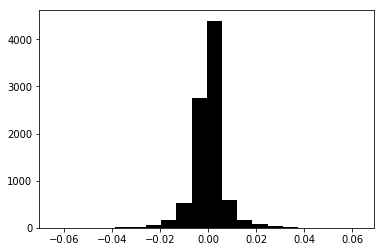

AAPL- Mean, Std -0.00013140212236247294 0.005031167220395682


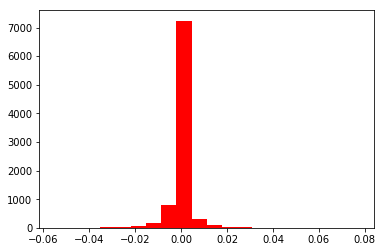

INTC- Mean, Std -0.00018019146294228 0.01947618869723907


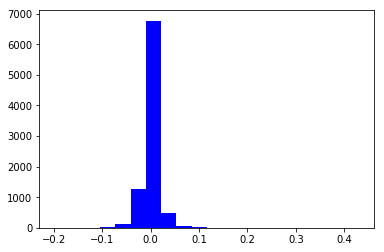

In [6]:
def derrivativeP(data):
    """
    Returns rate of change of the time series by comparing the previous and next value
    """
    firstValue = data[:-1]
    nextValue = data[1:]
    #print(len(firstValue),len(nextValue))
    return firstValue - nextValue
#Creating Rate of change
dIxic = derrivativeP(ixic_normal)
dAapl = derrivativeP(aapl_normal)
dIntc = derrivativeP(intc_normal)
# Plotting rate of change
plt.plot(t[:-1],dIntc,color=(0,0,1))
plt.plot(t[:-1],dAapl,color=(1,0,0))
plt.plot(t[:-1],dIxic,color=(0,0,0))

plt.xticks(range(1,len(ixic),252),range(1,36))
plt.show()
#Plot rate of change as histogram
plt.hist(dIxic,bins=20,color=(0,0,0))
print("IXIC- Mean, Std",dIxic.mean(),dIxic.std())
plt.show()
plt.hist(dAapl,bins=20,color=(1,0,0))
print("AAPL- Mean, Std",dAapl.mean(),dAapl.std())
plt.show()
plt.hist(dIntc,bins=20,color=(0,0,1))
print("INTC- Mean, Std",dIntc.mean(),dIntc.std())
plt.show()

### Proof : 
**Given: Y = c*X + b**

**To prove: r = +- 1, r = sign(c)**

**Symbols μ for mean**
$$Cov(X,Y) = E(X - \mu_x)(cX - c\mu_x) \implies c\times E(X - \mu_x)^2$$

$$\implies \sigma^2\times c$$

$$ Variance(Y) \implies Var(cX + b) \implies Var(cX) \implies \sigma_x^2\times c^2$$


$$ r = \frac{Cov(X,Y)}{\sigma_x\times\sigma_y} \implies \frac{ \sigma^2\times c}{\sigma_x^2\times |c|}$$

$$\implies r = \frac{c}{|c|} \text{ QED}$$

In [22]:
def covariance(x,y):
    """
    Returns covariance of X and Y
    """
    return (x- np.mean(x))*(y- np.mean(y))
def r(x,y,cov):
    """
    Returns coeffient of covarience for each year between X and Y
    """
    relations = []
    for i in range(0,35):
        # Appending Coeffient of Covarience for intervales of 252 which is number of working days a year
        relations.append(np.sum(cov[i*252:(i+1)*252])/(np.sum((x[i*252:(i+1)*252] - np.mean(x))**2)*np.sum((y[i*252:(i+1)*252] - np.mean(y))**2))**(1/2))
    return relations
def r_full(x,y,cov):
    """
    Returns coeffient of covarience for entire data set of X and Y
    """   
    return np.mean(cov)/(np.std(x)*np.std(y))
r_NA = r(ixic_normal,aapl_normal,covariance(ixic_normal,aapl_normal)) # NASDAQ-Apple
r_NI = r(ixic_normal,intc_normal,covariance(ixic_normal,intc_normal)) # NASDAQ-INTEL
r_IA = r(intc_normal,aapl_normal,covariance(intc_normal,aapl_normal)) # INTEL-Apple
print("Year\t","NA\t\t","NI\t\t","IA\n")
for i in range(0,35):
    print(i+1,r_NA[i],r_NI[i],r_IA[i])
r_NA_full = r_full(ixic_normal,aapl_normal,covariance(ixic_normal,aapl_normal)) # NASDAQ-Apple
r_NI_full = r_full(ixic_normal,intc_normal,covariance(ixic_normal,intc_normal)) # NASDAQ-INTEL
r_IA__full = r_full(intc_normal,aapl_normal,covariance(intc_normal,aapl_normal)) # INTEL-Apple
print("\nAverage",r_NA_full,r_NI_full,r_IA__full)

Year	 NA		 NI		 IA

1 0.9999351771413449 0.9999465993019827 0.9999981126661226
2 0.999905082123299 0.999832324625482 0.9999743862719062
3 0.9999640653187579 0.9999697748261174 0.9999966381482311
4 0.9999333553223355 0.9999544424140836 0.9999895403868692
5 0.9998767189501863 0.9999145322612504 0.9999915361546918
6 0.999873166105377 0.999852491199096 0.9999591724440073
7 0.9995380892317527 0.9995960505042796 0.9999623630729927
8 0.9999094019725308 0.9999164853115835 0.9998848374936237
9 0.9993745516999291 0.999806148419211 0.9988489016369941
10 0.9998407338287316 0.9999046862522329 0.9999024457134069
11 0.9972993456154381 0.9979161400380376 0.9921729590626722
12 0.9978673821728263 0.9949734796339822 0.991194867370334
13 0.9867094989328324 0.33886599981572085 0.1993253647728876
14 0.9755458845785038 -0.19774440496976772 -0.25671917747761186
15 -0.3037161306581286 0.5920037079923467 -0.9068608292908683
16 -0.9467384144718061 0.9571242322447178 -0.9444001682497029
17 -0.018217752344679903 0